In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv("./Datasets/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1002 non-null   object
 1   race/ethnicity               1002 non-null   object
 2   parental level of education  1002 non-null   object
 3   lunch                        1002 non-null   object
 4   test preparation course      1002 non-null   object
 5   math score                   1002 non-null   int64 
 6   reading score                1002 non-null   int64 
 7   writing score                1002 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.8+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1002.000000,1002.000000,1002.000000
mean,66.594810,69.549900,68.117764
std,16.403732,15.955733,15.462051
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,169.000000,174.000000,158.000000


In [6]:
missing_values = df.isnull().sum()
print(missing_values)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [7]:
outlier_indices = np.where((df['math score'] > 100) | (df['math score'] < 0))
print(outlier_indices)

(array([ 8,  9, 19, 21, 23, 25]),)


In [8]:
outlier_indices = np.where((df['reading score'] > 100) | (df['reading score'] < 0))
print(outlier_indices)
outlier_rows = df.iloc[outlier_indices[0]]
outlier_rows

(array([25, 29, 31, 32]),)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
25,female,group C,some high school,standard,none,169,173,73
29,female,group C,bachelor's degree,standard,none,67,169,75
31,female,group D,master's degree,standard,none,62,170,75
32,female,group D,some college,standard,none,69,174,74


In [9]:
outlier_indices = np.where((df['writing score'] > 100) | (df['writing score'] < 0))
print(outlier_indices)
outlier_rows = df.iloc[outlier_indices[0]]
outlier_rows

(array([16]),)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
16,female,group A,master's degree,standard,none,50,53,158


# InterQuantile Range Calculation

In [10]:
def detect_outliers_iqr(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(lower_bound," ",upper_bound)
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outliers = detect_outliers_iqr(df,'writing score')
outliers

24.0   112.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
16,female,group A,master's degree,standard,none,50,53,158
61,female,group C,some high school,free/reduced,none,0,17,10
78,male,group E,some high school,standard,none,30,26,22
329,male,group A,some college,free/reduced,none,28,23,19
598,male,group B,high school,free/reduced,none,30,24,15
982,female,group B,high school,free/reduced,none,8,24,23


In [11]:
import seaborn as sb

<Axes: ylabel='writing score'>

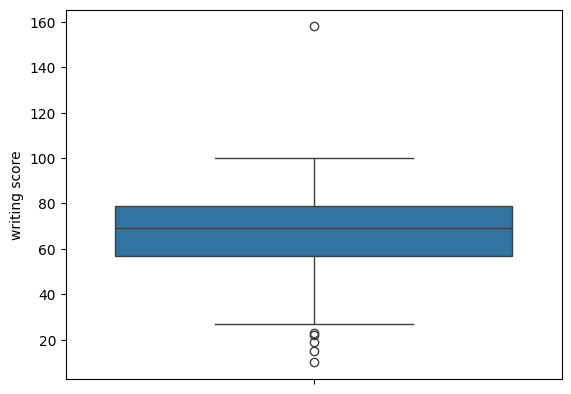

In [12]:
sb.boxplot(df['writing score'])

In [13]:
outliers = detect_outliers_iqr(df,'math score')
outliers

27.0   107.0


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
8,male,group D,high school,free/reduced,completed,164,64,67
19,female,group B,some high school,free/reduced,none,118,32,28
21,female,group C,associate's degree,free/reduced,none,154,58,61
23,female,group B,some college,free/reduced,completed,165,75,70
25,female,group C,some high school,standard,none,169,173,73
61,female,group C,some high school,free/reduced,none,0,17,10
147,female,group C,some college,free/reduced,none,22,39,33
340,female,group B,some high school,free/reduced,none,24,38,27
468,female,group D,associate's degree,free/reduced,none,26,31,38
789,female,group B,some college,standard,none,19,38,32


<Axes: ylabel='math score'>

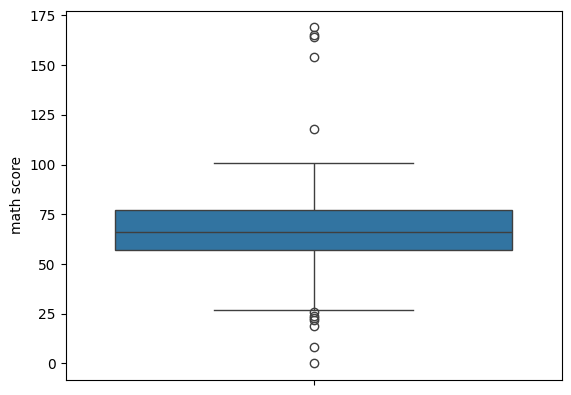

In [14]:
sb.boxplot(df['math score'])

<Axes: ylabel='reading score'>

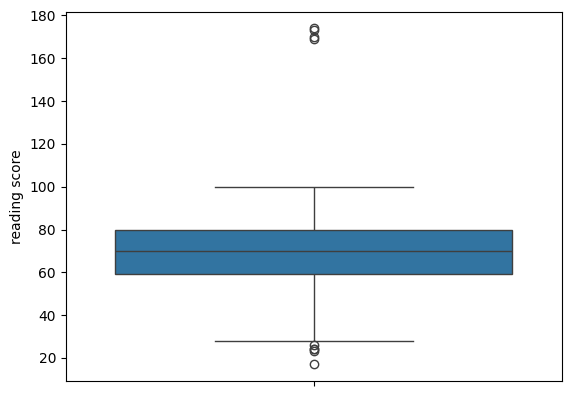

In [15]:
sb.boxplot(df['reading score'])

# Removing Outliers with IQR

In [16]:
def calculate_bounds(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return [lower_bound,upper_bound]

In [ ]:
def remove_outliers(df,column):
    bounds = calculate_bounds(df,column)
    upper = bounds[1]
    lower = bounds[0]
    print(upper,lower)
    upper_array = np.where(df[column] >= upper)[0]
    lower_array = np.where(df[column] <= lower)[0]
    print(upper_array,lower_array)
    df.drop(index = upper_array, inplace=True)
    df.drop(index = lower_array, inplace=True)
    

In [18]:
remove_outliers(df,'reading score')

111.5 27.5
[25 29 31 32] [ 61  78 329 598 982]


<Axes: ylabel='reading score'>

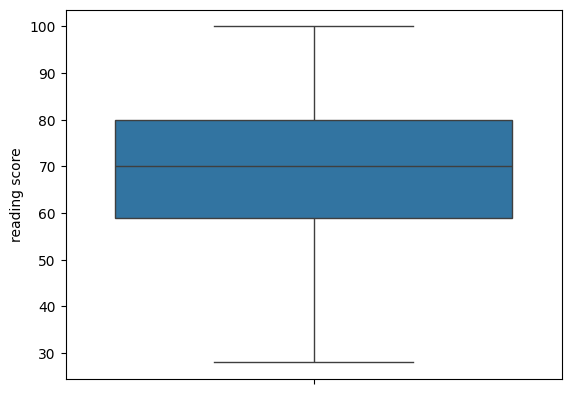

In [19]:
sb.boxplot(df['reading score'])

In [20]:
remove_outliers(df,'writing score')

110.5 26.5
[16] []


<Axes: ylabel='writing score'>

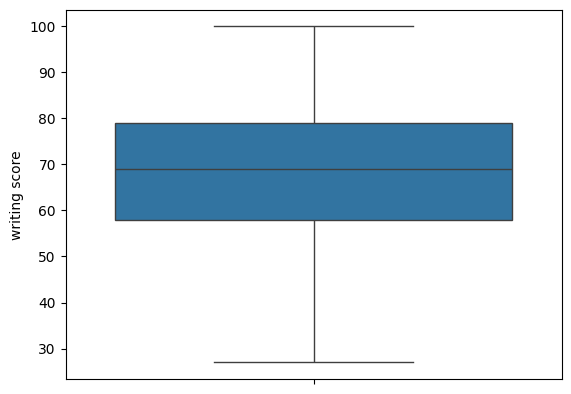

In [21]:
sb.boxplot(df['writing score'])

Min Max Scaling

In [22]:
# min max scaling
df['math score'] = (df['math score'] - df['math score'].min())/(df['math score'].max() - df['math score'].min())
df['math score'] = round(df['math score'],2)
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.36,72,74
1,female,group C,some college,standard,completed,0.34,90,88
2,female,group B,master's degree,standard,none,0.49,95,93
3,male,group A,associate's degree,free/reduced,none,0.19,57,44
4,male,group C,some college,standard,none,0.39,78,75


Z-Score

In [24]:
df['math score'] = (df['math score'] - df['math score'].mean()) / (df['math score'].std())
df['math score'] = round(df['math score'],2)
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.31,72,74
1,female,group C,some college,standard,completed,0.12,90,88
2,female,group B,master's degree,standard,none,1.51,95,93
3,male,group A,associate's degree,free/reduced,none,-1.27,57,44
4,male,group C,some college,standard,none,0.58,78,75


Decimal Scaling

In [25]:
df['math score'] = df['math score'] / 100
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,0.0031,72,74
1,female,group C,some college,standard,completed,0.0012,90,88
2,female,group B,master's degree,standard,none,0.0151,95,93
3,male,group A,associate's degree,free/reduced,none,-0.0127,57,44
4,male,group C,some college,standard,none,0.0058,78,75
